# Predictive modeling of customer bookings (British Airways)

Introduction:

This project is to build predictive model for British Airways, provided through Forage job simulation platform. The objective is to analyze historical customer booking data and build a machine learning model that predicts customer likelihood of the booking being completed.

Goals:

* Analyzing the data to get business insights
* Handling imbalance on the data
* Building a model
* Evaluating the performance
* Feature importance: How each variable contibutes to the predictive model's power.

In [3]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [4]:
df = pd.read_csv("/content/customer_booking.csv", encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

   * num_passengers = number of passengers travelling

   * sales_channel = sales channel booking was made on

   * trip_type = trip Type (Round Trip, One Way, Circle Trip)

   * purchase_lead = number of days between travel date and booking date

   * length_of_stay = number of days spent at destination

   * flight_hour = hour of flight departure

   * flight_day = day of week of flight departure

   * route = origin -> destination flight route

   * booking_origin = country from where booking was made

   * wants_extra_baggage = if the customer wanted extra baggage in the booking

   * wants_preferred_seat = if the customer wanted a preferred seat in the booking

   * wants_in_flight_meals = if the customer wanted in-flight meals in the booking

   * flight_duration = total duration of flight (in hours)

   * booking_complete = flag indicating if the customer completed the booking

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df.shape

(50000, 14)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df["sales_channel"].value_counts()

,count
sales_channel,
Internet,43917
Mobile,5364


In [11]:
route_data = df["route"].value_counts()
print(route_data)

print(df["route"].nunique())

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
CKGKNO       1
KBRWUH       1
JEDMFM       1
KTMTWU       1
MRUXIY       1
Name: count, Length: 799, dtype: int64
799


In [12]:
booking_origin_df = df["booking_origin"].value_counts()
booking_origin_df

,count
booking_origin,
Australia,17691
Malaysia,7055
South Korea,4502
Japan,3819
China,3284
...,...
Ghana,1
Gibraltar,1
Guatemala,1


In [13]:
target_dis = df["booking_complete"].value_counts()
target_dis

,count
booking_complete,
0,41890
1,7391


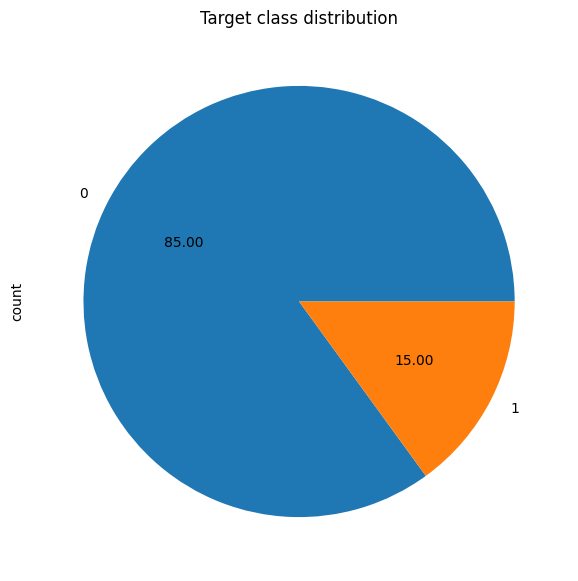

In [14]:
plt.figure(figsize = (10,7))
target_dis.plot.pie(autopct='%.2f')
plt.title("Target class distribution")
plt.show()

**Observation: Class Imbalance**

The target class `booking_complete` is highly imbalanced, which has a important implication for modelling

  * Class `0` -> Represents the customers who did not complete their booking (Majority)
  * Class `1` -> Represents the customers who successfully booked their tickets (Minority)

from the obseravtion, 85% of the records belongs to class 0, while 15% of the records belongs to class 1. This imbalance can negatively affect the model's performance particularly on the minority class which is greater business interest. I need to try appropriate resampling techniques.

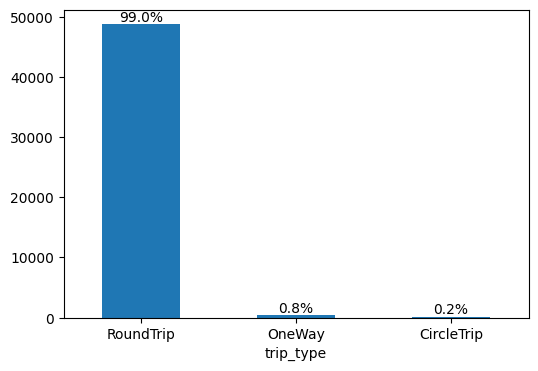

In [15]:
# Which type of trip do customers most commonly book?

counts = df["trip_type"].value_counts()
ax  = counts.plot(figsize = (6,4), kind="bar")

# Add the counts percentage on top of the bars
total_counts = counts.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = (height/total_counts) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width()/ 2., p.get_height()),
                ha = "center", va = "center",
                xytext = (0,5),
               textcoords = "offset points")

plt.xticks(rotation=0)
plt.show()

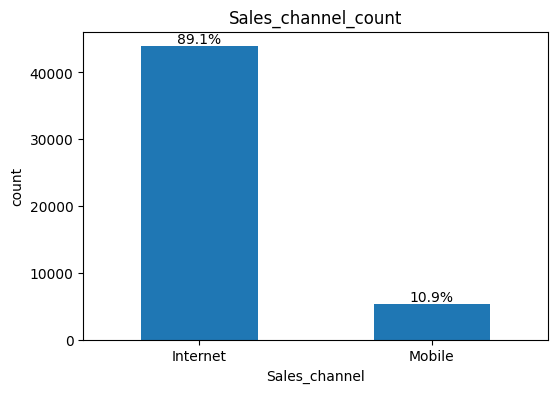

In [16]:
# Which sales channel customers using the most to book tickets?

sales_channel_count = df["sales_channel"].value_counts()
total_users = sales_channel_count.sum()
ax = sales_channel_count.plot(figsize = (6,4), kind= "bar")

for p in ax.patches:
    height = p.get_height()
    percentage = (height/total_users) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center",
                xytext = (0,5),
                textcoords = 'offset points')
plt.title("Sales_channel_count")
plt.xlabel("Sales_channel")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

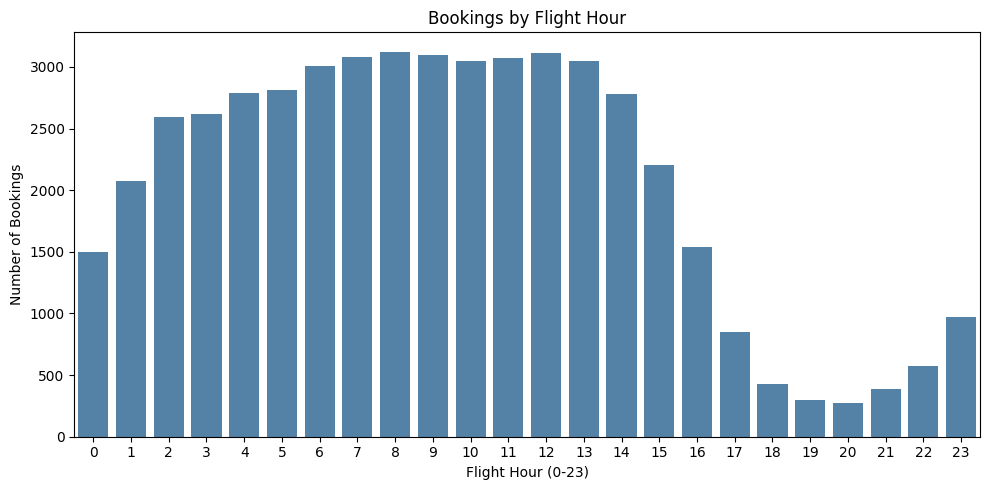

In [17]:
# Flight departure timing analysis

hour_counts = df['flight_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='steelblue')
plt.title('Bookings by Flight Hour')
plt.xlabel('Flight Hour (0-23)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

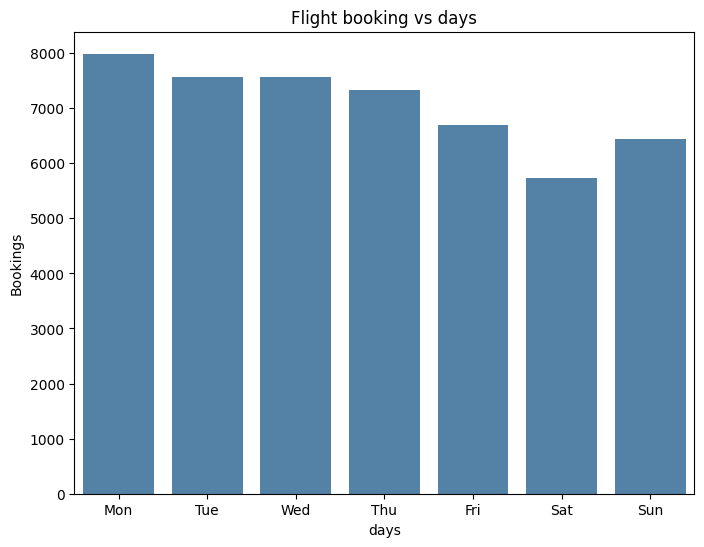

In [18]:
# Customers flight booking trend by day of the week

day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
flight_booked_days = df["flight_day"].value_counts().reindex(day_order)

plt.figure(figsize=(8,6))
sns.barplot(x = flight_booked_days.index, y = flight_booked_days.values, color = "steelblue")
plt.xlabel("days")
plt.ylabel("Bookings")
plt.title("Flight booking vs days")
plt.show()

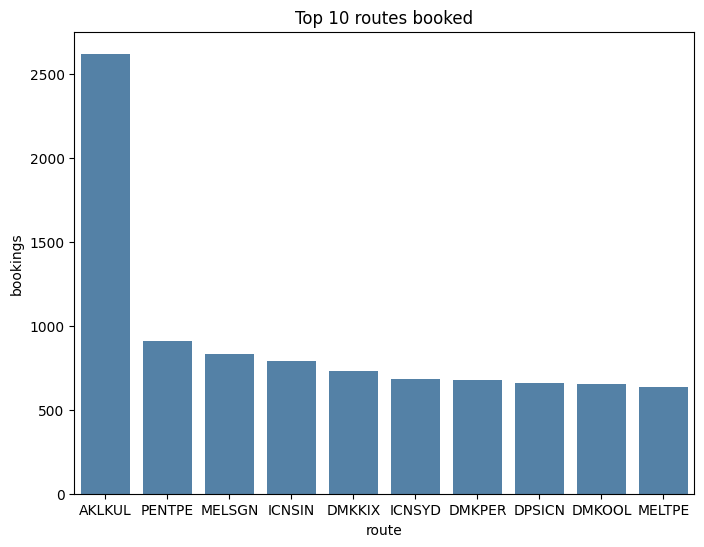

In [19]:
# The top 10 frequently booked routes

route_stats = df.groupby(by="route").agg(bookings=('route','size'), completion_rate=('booking_complete','mean')).reset_index()

route_stats_sorted = route_stats.sort_values('bookings',ascending = False)
top_10 = route_stats_sorted.head(10)

plt.figure(figsize = (8,6))
sns.barplot(data = top_10, x = 'route', y = 'bookings', color ="steelblue")
plt.title("Top 10 routes booked")
plt.show()

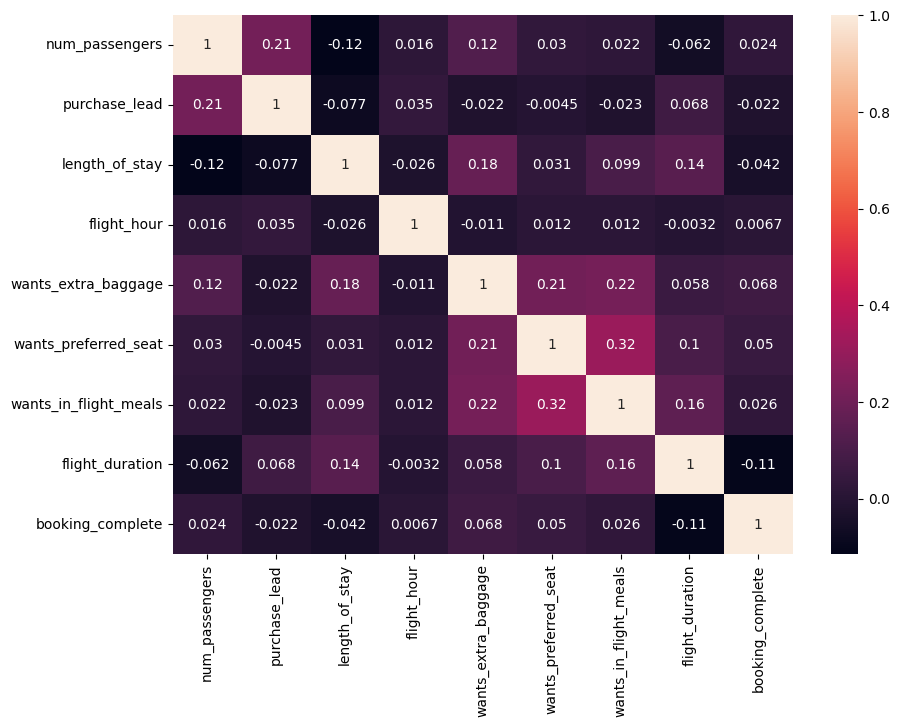

In [20]:
# Correlation between Numerical features
numerical_columns = ["num_passengers","purchase_lead", "length_of_stay", "flight_hour", "wants_extra_baggage",
"wants_preferred_seat", "wants_in_flight_meals", "flight_duration", "booking_complete"]

correlation = df[numerical_columns].corr()

plt.figure(figsize = (10,7))
sns.heatmap(correlation, annot = True)
plt.show()

## Feature engineering

To improve model's performance, we generate additional features that helps capture patterns in the data more effectively.

### New Features planned:

1. **Time of the day bucket** - categorize the `flight hour` into time segments like Morning, Afternoon, Evening, and Night.
2. **Group booking indicator** - identify whether a booking involves more than one passenger.
3. **Weekend booking indicator** - Flag, If the customers booked ticket on the weekends.
4. **Long trip indicator** - Identify whether the customers planned to stay on the destination for extented period.
5. **Requesting all services ?** - Flag, if the customer wants all the services ( wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals).


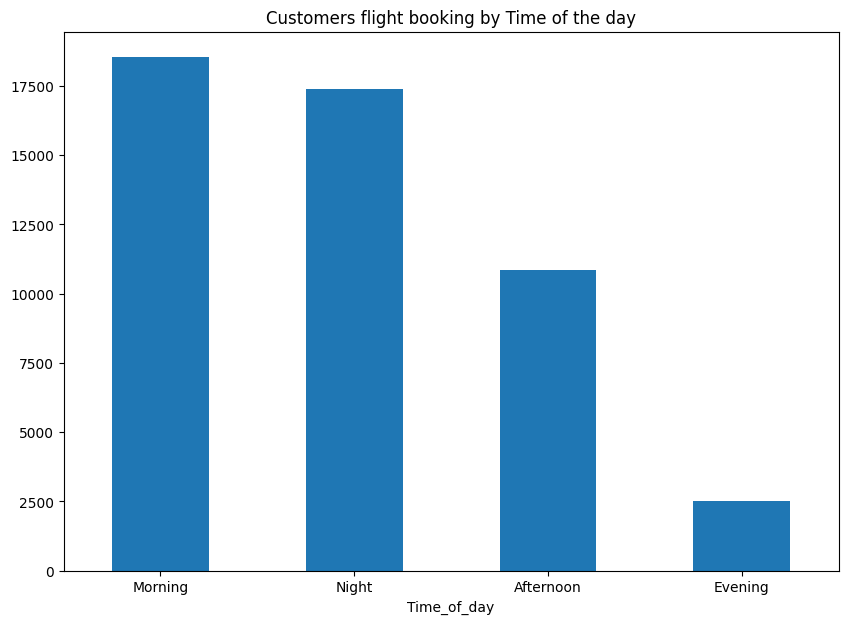

In [21]:
# 1. Time of the day bucket
df["Time_of_day"] = pd.cut(df["flight_hour"], bins = [-1,6,12,18,24], labels = ['Night','Morning','Afternoon','Evening'])

df.Time_of_day.value_counts().plot(figsize = (10,7), kind="bar")
plt.title("Customers flight booking by Time of the day")
plt.xticks(rotation=0)
plt.show()

In [22]:
# 2. Group booking indicator
df["is_group_trip"] = (df["num_passengers"] > 1).astype(int)

In [23]:
# 3. Weekend booking indicator
df["is_weekend"] = (df["flight_day"].isin(["Sat","Sun"])).astype(int)

In [24]:
# 4. Long trip indicator
df["is_long_trip"] = (df["length_of_stay"] > 7).astype(int)

In [25]:
# 5. Requesting all services ?
df["want_all_service"] = (df["wants_extra_baggage"] & df["wants_preferred_seat"] & df["wants_in_flight_meals"])

In [26]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Time_of_day,is_group_trip,is_weekend,is_long_trip,want_all_service
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Morning,1,1,1,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,Night,0,1,1,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Afternoon,1,0,1,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,Night,0,1,1,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Afternoon,1,0,1,0


## Preprocessing

In [27]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [28]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [29]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

### Frequency Encoding

**Frequency encoding** replaces each category in a feature with the number of times it appears in the dataset. In other words, each category is substituted by its frequency count or proportion.

One of the main advantages of frequency encoding is that it can effectively handle **high-cardinality categorical features** (i.e., features with many unique values), without drastically increasing the number of columns — as happens with one-hot encoding.

In this dataset, we apply frequency encoding to:

- **`route`** — 799 unique values  
- **`booking_origin`** — 104 unique values

These columns are encoded using their relative frequencies to make them more model-friendly while preserving useful information about how common each category is.



In [30]:
# Frequency Encoding ( route and booking origin column both have more than 100 features)

route_count = df["route"].value_counts(normalize = True)
booking_origin_count = df["booking_origin"].value_counts(normalize = True)

df["route_encoded"] = df["route"].map(route_count)
df["booking_origin_encoded"] = df["booking_origin"].map(booking_origin_count)

# Drop the actual columns
df = df.drop(["route", "booking_origin"], axis=1)

In [31]:
# One-Hot Encoding of Categorical Features

from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ["sales_channel", "trip_type", "Time_of_day"]
data_to_encode = df[columns_to_encode]

one_hot_encoding = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_encoded_array = one_hot_encoding.fit_transform(data_to_encode)

encoded_column_names = one_hot_encoding.get_feature_names_out(columns_to_encode)
df_encode_df = pd.DataFrame(df_encoded_array, columns=encoded_column_names, index=df.index)
df_processed = pd.concat([df.drop(columns=columns_to_encode), df_encode_df], axis=1)
df_processed

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_encoded,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,Time_of_day_Afternoon,Time_of_day_Evening,Time_of_day_Morning,Time_of_day_Night
0,2,262,19,7,6,1,0,0,5.52,0,...,0.021509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,112,20,3,6,0,0,0,5.52,0,...,0.021509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,...,0.025527,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,96,31,4,6,0,0,1,5.52,0,...,0.021509,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,...,0.025527,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
49996,1,111,6,4,7,0,0,0,5.62,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
49998,1,15,6,11,1,1,0,1,5.62,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


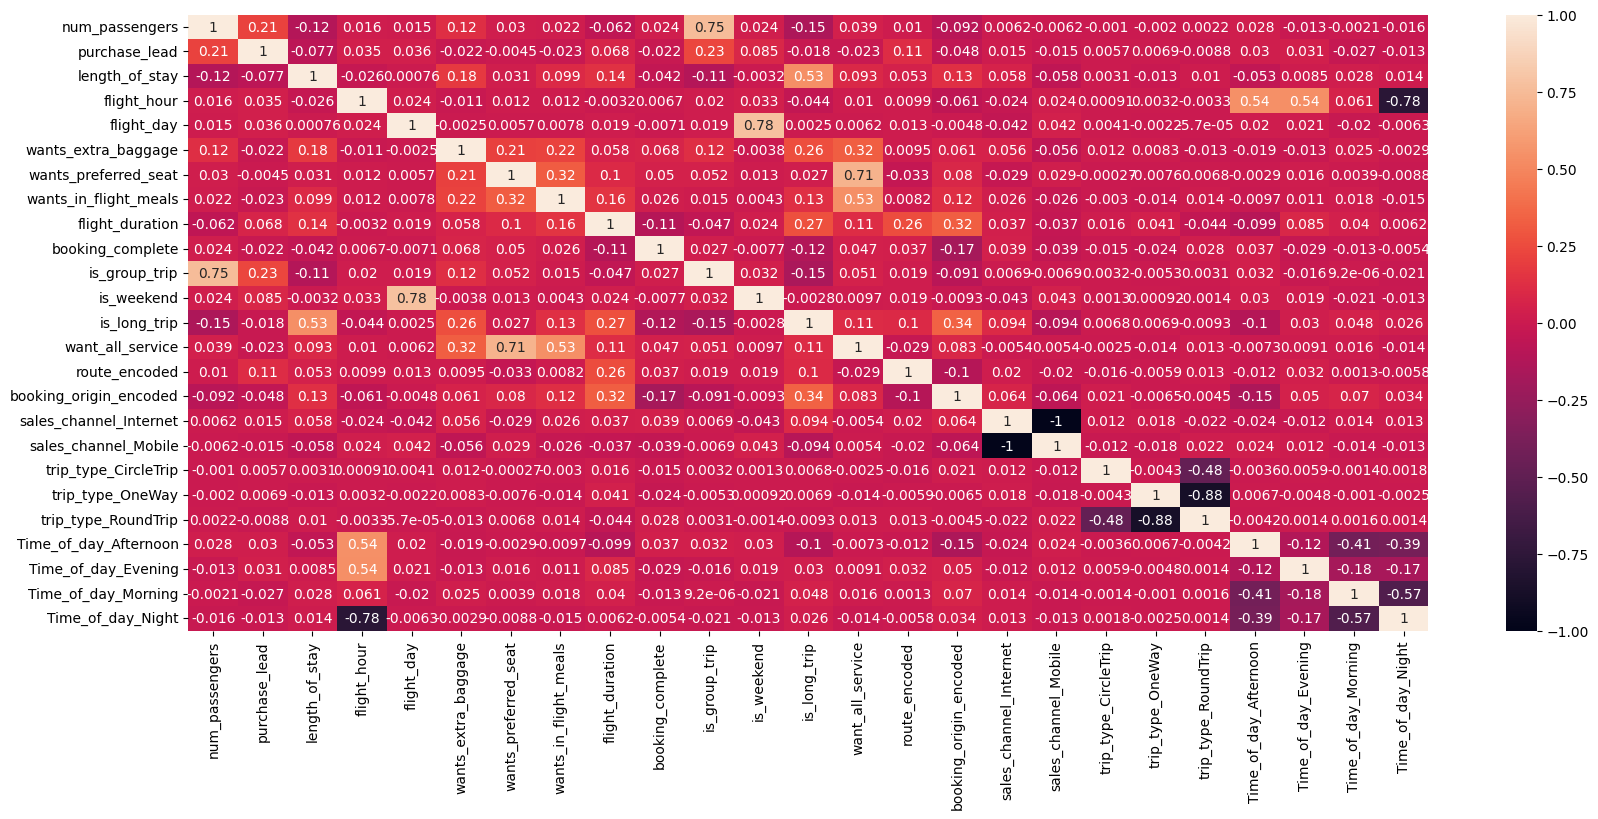

In [32]:
# Correlation between all features
corr = df_processed.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr, annot = True)
plt.show()

In [33]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          49281 non-null  int64  
 1   purchase_lead           49281 non-null  int64  
 2   length_of_stay          49281 non-null  int64  
 3   flight_hour             49281 non-null  int64  
 4   flight_day              49281 non-null  int64  
 5   wants_extra_baggage     49281 non-null  int64  
 6   wants_preferred_seat    49281 non-null  int64  
 7   wants_in_flight_meals   49281 non-null  int64  
 8   flight_duration         49281 non-null  float64
 9   booking_complete        49281 non-null  int64  
 10  is_group_trip           49281 non-null  int64  
 11  is_weekend              49281 non-null  int64  
 12  is_long_trip            49281 non-null  int64  
 13  want_all_service        49281 non-null  int64  
 14  route_encoded           49281 non-null  flo

## Train Test Split

### StratifiedShuffleSplit:

`StratifiedShuffleSplit` is a train-test splitting strategy that ensures the **class distribution in the target variable** remains consistent between the training and testing sets. This is particularly useful when working with **imbalanced classification problems**, as a random split may result in uneven class representation — which can skew model evaluation.

Unlike `StratifiedKFold`, which creates multiple folds for cross-validation, `StratifiedShuffleSplit` performs **randomized train-test splits** while preserving the class proportions in each split. It is ideal when you only need **one balanced split** instead of multiple folds.

In this project, we use `StratifiedShuffleSplit` with `n_splits=1` and `test_size=0.2` to generate a **single 80-20 train-test split** that maintains the same distribution of the `booking_complete` classes (0 = not booked, 1 = booked) across both sets. This allows us to evaluate the model on a representative subset of the data.



In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df_processed.drop(["booking_complete"], axis=1)
y = df_processed["booking_complete"]

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state= 42)

for fold, (train_index, test_index) in enumerate(sss.split(X,y)):
  print("X_train_index: ", train_index, "X_test_index: ", test_index)
  print("Random_split --->, ", fold + 1)
  X_train_sfold, X_test_sfold = X.iloc[train_index], X.iloc[test_index]
  y_train_sfold, y_test_sfold = y.iloc[train_index], y.iloc[test_index]

len(X_train_sfold), len(X_test_sfold), len(y_train_sfold), len(y_test_sfold)

X_train_index:  [40627 39198 13457 ... 26148 11840   213] X_test_index:  [18325 19175 30409 ... 30605  5845 11246]
Random_split --->,  1


(39424, 9857, 39424, 9857)

In [35]:
np.equal(df.shape[0], (len(X_train_sfold) + len(X_test_sfold)))

np.True_

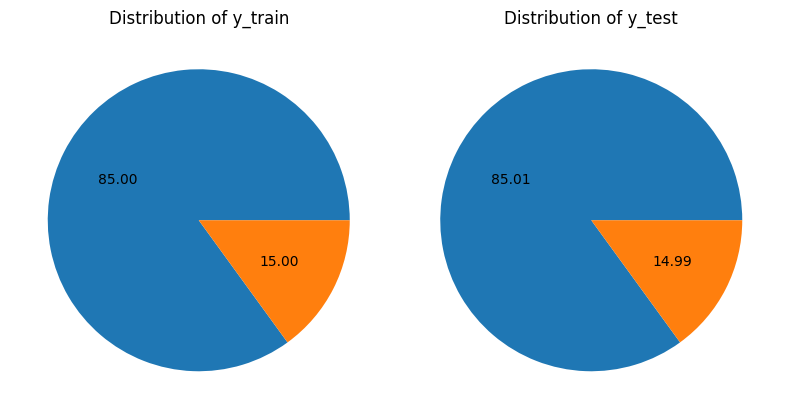

In [36]:
# Check the distribution of target value on train and test data
count_y_train = y_train_sfold.value_counts()
count_y_test = y_test_sfold.value_counts()

fig, axs = plt.subplots(1,2,figsize=(8,6))

# Plot y_train distribution
axs[0].pie(count_y_train,autopct= "%.2f")
axs[0].set_title("Distribution of y_train")

# Plot y_test distribution
axs[1].pie(count_y_test,autopct= "%.2f")
axs[1].set_title("Distribution of y_test")
plt.tight_layout()
plt.show()

## Random Under Sampling (on Training Data)

We applied **Random Under Sampling** only on the training data to balance the class distribution. This ensures that the model learns equally from both classes. The test set was kept imbalanced to evaluate the model’s performance in a **real-world scenario**, where such imbalance naturally exists.



In [37]:
from imblearn.under_sampling import RandomUnderSampler

# Splitted full data using StratifiedShuffleSplit
# Then applied undersampling **only on training data** to avoid data leakage

ru_sampler = RandomUnderSampler(random_state = 42)
X_train_resampled, y_train_resampled = ru_sampler.fit_resample(X_train_sfold, y_train_sfold)

len(X_train_resampled), len(y_train_resampled)

(11826, 11826)

In [38]:
X_train_resampled.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,is_group_trip,...,booking_origin_encoded,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,Time_of_day_Afternoon,Time_of_day_Evening,Time_of_day_Morning,Time_of_day_Night
17263,1,33,25,11,5,1,1,1,8.83,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6881,1,24,20,14,1,1,0,1,8.58,0,...,0.358982,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
41749,1,223,5,8,4,1,0,0,5.62,0,...,0.143159,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8153,2,23,30,17,3,1,0,0,5.52,1,...,0.025527,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
12129,1,111,25,16,5,1,0,0,6.42,0,...,0.066638,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [39]:
y_train_resampled.head()

,booking_complete
17263,0
6881,0
41749,0
8153,0
12129,0


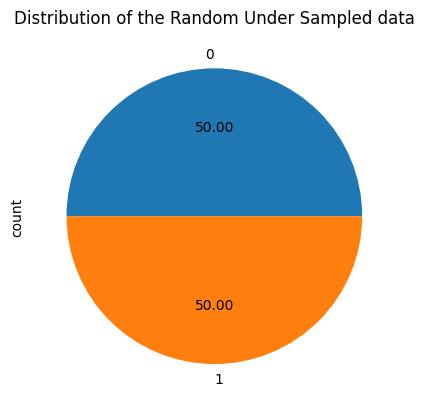

In [40]:
y_train_resampled.value_counts().plot.pie(autopct = "%.2f")
plt.title("Distribution of the Random Under Sampled data")
plt.show()

## Model Selection and Evaluation

To solve the classification problem, we evaluated multiple supervised learning models, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier.

Given the business objective, our primary focus is on the recall metric, as it is crucial to identify as many positive cases (e.g., customers likely to book) as possible, even at the cost of some false positives.

In [41]:
print("Train:\n", y_train_resampled.value_counts(normalize=True))
print("\nTest:\n", y_test_sfold.value_counts(normalize=True))

Train:
 booking_complete
0    0.5
1    0.5
Name: proportion, dtype: float64

Test:
 booking_complete
0    0.850056
1    0.149944
Name: proportion, dtype: float64


We balanced the training data using the undersampling technique to ensure the model learns equally from both classes, while keeping the test set imbalanced to evaluate the model’s performance in a real-world scenario.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report

In [43]:
%%time

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "XGB classifier": XGBClassifier()
}

# parameter grid
params = {
    "Logistic Regression": {
        "class_weight": ["balanced"],
        "C": [0.01, 0.1, 1.0, 10.0]
    },
    "Decision tree": {
        "criterion": ['gini','entropy'],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2],
        'max_features': ["sqrt","log2"],
        'class_weight': ["balanced"]
    },
    "Random forest":{
        'n_estimators': [100,200],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2],
        'class_weight': ["balanced"],
        'max_features': ['sqrt','log2']
    },
    "XGB classifier":{
        'max_depth':[6, 8],
        'learning_rate': [0.01, 0.05]
    }
}

# Stratified Cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store F1 scores
model_f1_scores = {}

for model_name, model_obj in models.items():
    print(f"\nModel ---> {model_name}")

    param_grid = params[model_name]

    random_search = RandomizedSearchCV(
        estimator=model_obj,
        param_distributions=param_grid,
        n_iter=2,
        scoring='f1',
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled, y_train_resampled)
    best_model = random_search.best_estimator_

    y_preds = best_model.predict(X_test_sfold)

    # F1 Score
    score = f1_score(y_test_sfold, y_preds)
    model_f1_scores[model_name] = score

    print(f"{model_name} ---> Best Parameters: {random_search.best_params_}")
    print("Classification Report:")
    print(classification_report(y_test_sfold, y_preds))
    print("-" * 60)



Model ---> Logistic Regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Logistic Regression ---> Best Parameters: {'class_weight': 'balanced', 'C': 10.0}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.57      0.71      8379
           1       0.23      0.73      0.35      1478

    accuracy                           0.60      9857
   macro avg       0.58      0.65      0.53      9857
weighted avg       0.82      0.60      0.65      9857

------------------------------------------------------------

Model ---> Decision tree
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Decision tree ---> Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'gini', 'class_weight': 'balanced'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      8379
           1       0.21      0.56      0

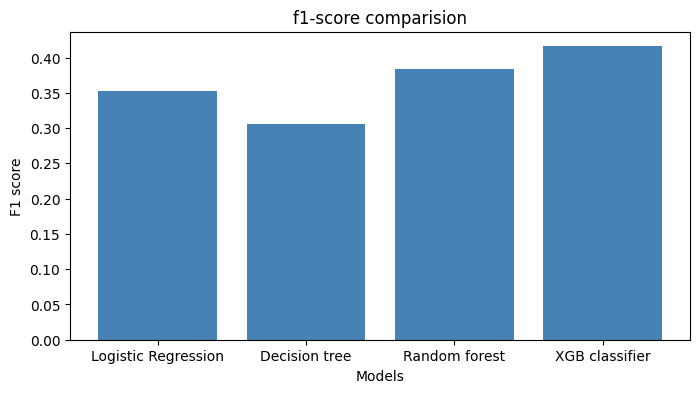

In [44]:
plt.figure(figsize = (8,4))
plt.bar(model_f1_scores.keys(), model_f1_scores.values(), color = "steelblue")
plt.title("f1-score comparision")
plt.xlabel("Models")
plt.ylabel("F1 score")
plt.show()

Summary:

* Among all models, the XGBoost classifier achieved the highest F1 score and has been selected as the best-performing model for further analysis.

In [45]:
# Final Model: XGBoost Classifier

best_model = XGBClassifier(max_depth = 8, learning_rate = 0.05)
best_model.fit(X_train_resampled, y_train_resampled)
y_pred_best_model = best_model.predict(X_test_sfold)

print(classification_report(y_test_sfold, y_pred_best_model))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      8379
           1       0.29      0.74      0.42      1478

    accuracy                           0.69      9857
   macro avg       0.61      0.71      0.60      9857
weighted avg       0.84      0.69      0.73      9857



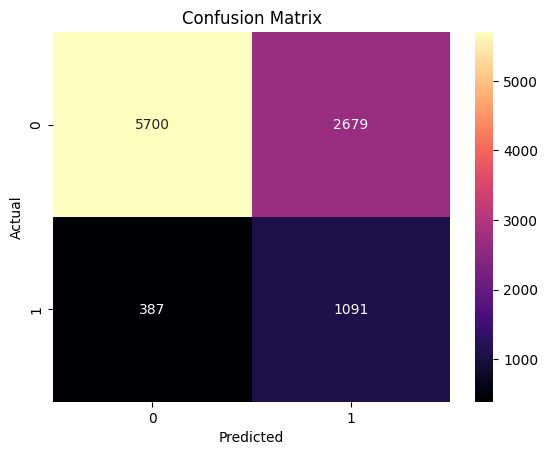

In [46]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test_sfold, y_pred_best_model)

sns.heatmap(con_matrix, cmap = "magma", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

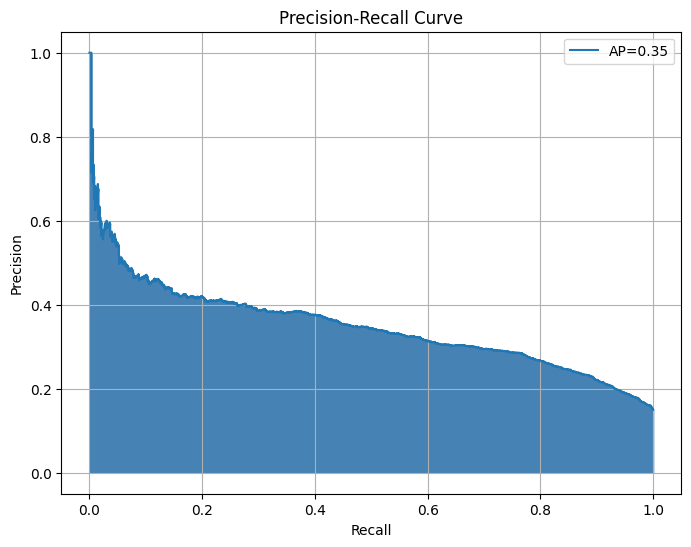

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_score = best_model.predict_proba(X_test_sfold)[:,1]

precision, recall, thresold = precision_recall_curve(y_test_sfold, y_score)

avergae_p = average_precision_score(y_test_sfold, y_score)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"AP={avergae_p:.2f}")
plt.fill_between(recall, precision, color = "steelblue")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

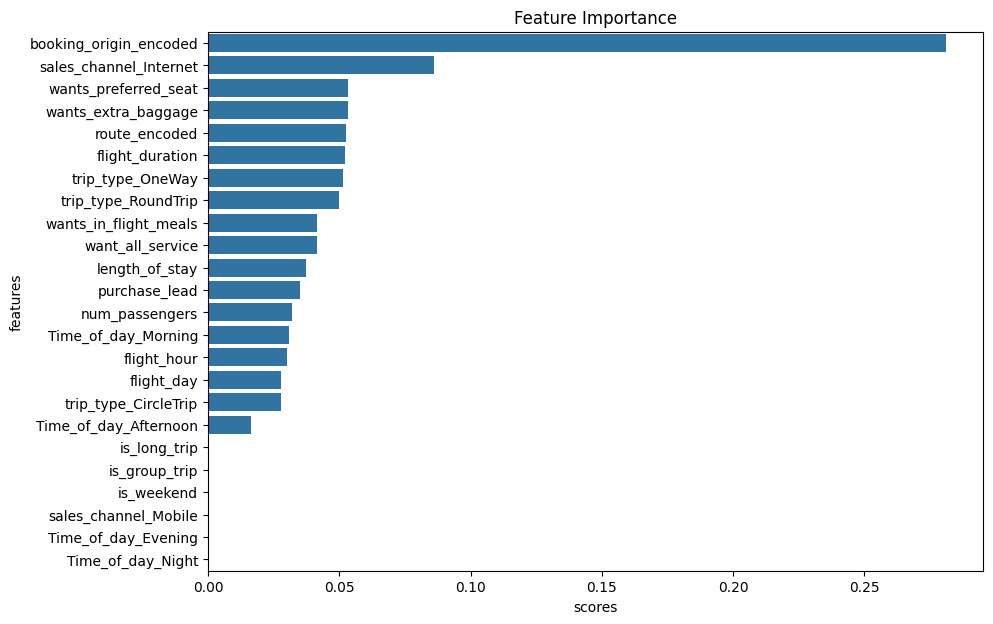

In [48]:
# Getting important feature

scores = best_model.feature_importances_

features = X_train_resampled.columns

feature_importance_df = pd.DataFrame({"scores": scores, "features": features})
feature_importance_df_sorted = feature_importance_df.sort_values(ascending = False, by = "scores")

# feature_important_sort

plt.figure(figsize = (10,7))
sns.barplot(feature_importance_df_sorted, x = feature_importance_df_sorted["scores"], y = feature_importance_df_sorted["features"])
plt.title("Feature Importance")
plt.show()

## Conclusion:

After evaluating multiple models, the **XGBoost classifier** was selected as the best-performing model based on its **higher recall score**, which is critical in this context as it helps identify more customers who are likely to complete their booking.

The model achieved an **average precision (AP) score of 0.35**, indicating moderate performance.

In terms of **feature importance**, variables such as **Booking Origin** and **Sales Channel** were the most influential in predicting booking completion. This insight can guide future marketing or product strategies aimed at increasing booking rates.
